In [1]:
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

from   pkg_resources     import resource_filename
from   astropy.table     import Table
from   scipy.interpolate import interp1d
from   scipy.stats       import linregress

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [5]:
from   tmr_ecorr         import tmr_ecorr
from   params            import params
from   ajs_kcorr         import ajs_kcorr

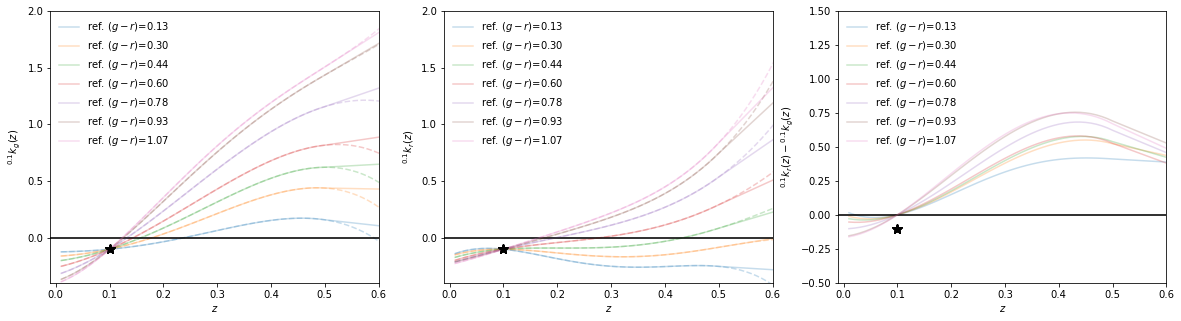

In [33]:
x         = ajs_kcorr()

ref_gmrs  = [0.130634, 0.298124, 0.443336, 0.603434, 0.784644, 0.933226, 1.0673]
zs        = np.arange(0.01,0.801,0.01)

fig, axes = plt.subplots(1,3, figsize=(20,5))

colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

for ref_gmr, color in zip(ref_gmrs, colors):
    # compare _eval to ref_eval, compares +- extrapolation.                                                                                                                                                                               
    gks = x._eval(ref_gmr, zs, 'g')
    rks = x._eval(ref_gmr, zs, 'r')

    axes[0].plot(zs, gks, '--', label='', alpha=0.25, c=color)
    axes[1].plot(zs, rks, '--', label='', alpha=0.25, c=color)

    gks = x.ref_eval(ref_gmr, zs, 'g')
    rks = x.ref_eval(ref_gmr, zs, 'r')

    axes[0].plot(zs, gks,     c=color, alpha=0.25, label=r'ref. $(g-r)$' + '={:.2f}'.format(ref_gmr))
    axes[1].plot(zs, rks,     c=color, alpha=0.25, label=r'ref. $(g-r)$' + '={:.2f}'.format(ref_gmr))
    axes[2].plot(zs, gks-rks, c=color, alpha=0.25, label=r'ref. $(g-r)$' + '={:.2f}'.format(ref_gmr))
    
    axes[0].set_ylabel(r"$^{0.1}k_g(z)$")
    axes[1].set_ylabel(r"$^{0.1}k_r(z)$")
    axes[2].set_ylabel(r"$^{0.1}k_r(z) - ^{0.1}k_g(z)$")
    
    for ax in axes:
        ax.set_xlabel(r"$z$")
        ax.set_xlim(-0.01,0.6)
        
        ax.set_ylim(-0.4, 2.0)
        ax.legend(loc=2, frameon=False)
        
        ax.plot(0.1, -0.103, marker='*', c='k', markersize=10)
        
        ax.axhline(0.0, c='k', lw=0.4)
        
    axes[2].set_ylim(-.5, 1.5)

# Done.